## **Retroalimentación**
1 **Analisis exploratorio 6/10**

1. Aunque el análisis inicial es bueno, el estudio no especifica claramente con qué datos se trabajará para cada modelo -1
2. no hacen un analisis de linealidad -3

2. **Splines  24/30**

1. El análisis se enfoca en 4 características específicas, incluyendo una categórica.  se realiza por  aparte cada uno y con direntes  nodos hacen una validacion, mas no cruzada -4

2. Se recomienda extender la exploración a más de una característica para validar si esto mejora la calidad y utilidad de la información obtenida




3. **kernel 27/50**

1. Incluyen varias características, pero no justifican la elección de estas y el análisis previo resulta algo limitado. -3 puntos

2. No queda claro cómo realizan las gráficas cuando manejan múltiples características. -3 puntos

3. No se especifica cuál es el modelo más efectivo en esta sección. -2 puntos

4. Falta un análisis detallado del kernel y parece que hay aspectos incompletos en el modelo. -5 puntos

5. El análisis se presenta incompleto. -10 puntos


4. **Comparación y Evaluación 5/10**:

1. como falta informacion noeta bien la comparacion y evalación

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install patsy


# 1.

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Obtener una lista de las variables categóricas (tipo 'object')
columnas_categoricas = data.select_dtypes(include=['object']).columns.tolist()

# Imprimir la lista de variables categóricas
print(columnas_categoricas)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
nombres_variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
print(nombres_variables_numericas)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Desde el principio operamos todas las variables categoricas a numericas para poder ver su relacion con la variable objetivo

In [ ]:
columnas_categoricas = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']  # Lista de columnas categóricas

for columna in columnas_categoricas:
    data[columna], _ = pd.factorize(data[columna])


In [ ]:
# Estadísticas descriptivas para variables numéricas
numeric_stats = data.describe()


In [ ]:
numeric_stats

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000
mean,730.500000,56.897260,0.340411,70.049958,10516.828082,0.004110,-0.909589,0.408219,0.195205,0.000685,...,2.758904,-0.989726,-0.667123,-0.956849,43.489041,6.321918,2007.815753,0.234932,0.35000,180921.195890
std,421.610009,42.300571,0.798309,24.284752,9981.264932,0.063996,0.372151,0.582296,0.642010,0.026171,...,40.177307,0.158916,0.793316,0.245984,496.123024,2.703626,1.328095,0.804553,0.88787,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,2006.000000,0.000000,0.00000,34900.000000
25%,365.750000,20.000000,0.000000,59.000000,7553.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,5.000000,2007.000000,0.000000,0.00000,129975.000000
50%,730.500000,50.000000,0.000000,69.000000,9478.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,6.000000,2008.000000,0.000000,0.00000,163000.000000
75%,1095.250000,70.000000,0.000000,80.000000,11601.500000,0.000000,-1.000000,1.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,8.000000,2009.000000,0.000000,0.00000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,738.000000,2.000000,3.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.00000,755000.000000


In [ ]:
num_variables = data.shape[1]

# Imprimir el número total de variables
print("Número total de variables:", num_variables)

Número total de variables: 81


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
feature_names = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen',
    'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
    'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
    'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
]
# Crear un widget de deslizador para seleccionar una característica
feature_selector = widgets.Dropdown(
    options=feature_names,  # Lista de nombres de características
    description='Feature:'
)

# Función para actualizar la gráfica cuando se selecciona una característica
def update_plot(selected_feature):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[selected_feature], data['SalePrice'], edgecolor='k', s=20)
    plt.xlabel(selected_feature)
    plt.ylabel('SalePrice')
    plt.title(f'Relación entre {selected_feature} y SalePrice')
    plt.grid(True)
    plt.show()

# Conectar el widget al controlador de actualización
widgets.interactive(update_plot, selected_feature=feature_selector)

interactive(children=(Dropdown(description='Feature:', options=('MSSubClass', 'MSZoning', 'LotFrontage', 'LotA…

LotFrontage puede tener una relacion no lineal

LandContour puede ser utilizada para el kernel

  Neighborhood puede tener una relacion no lineal, parece trigonometrica

Condition 1 tambien

HouseStyle parece una funcion parabolica

Overqual tiene gran correlacion y parece una funcion lineal

YearBuilt y yearRemodeAdd tiene una relacion no lineal

MasVnrArea tiene relacion no lineal

BsmtFinSF1 relacion no lineal

TotalBsmtSF relacion no lineal

1stFlrSF y 2ndFlrSF tienen relacion lineal per5o de cierte forma el 1 influye en el 2, ademas no todos tienen 2 pisos por lo que solo con el 1 esta bien

GrLivArea relacion lineal

FullBath realcion lineal

TotRmsAbvGrd relacion lineal

GarageType tiene correlacion pero en la grafica no es tan significante

GarageYrBlt relacion no lineal

GarageCars relacion lineal

GarageArea relacion no lineal pero hay bastantes sin garaje

WoodDeckSF relacion no lineal

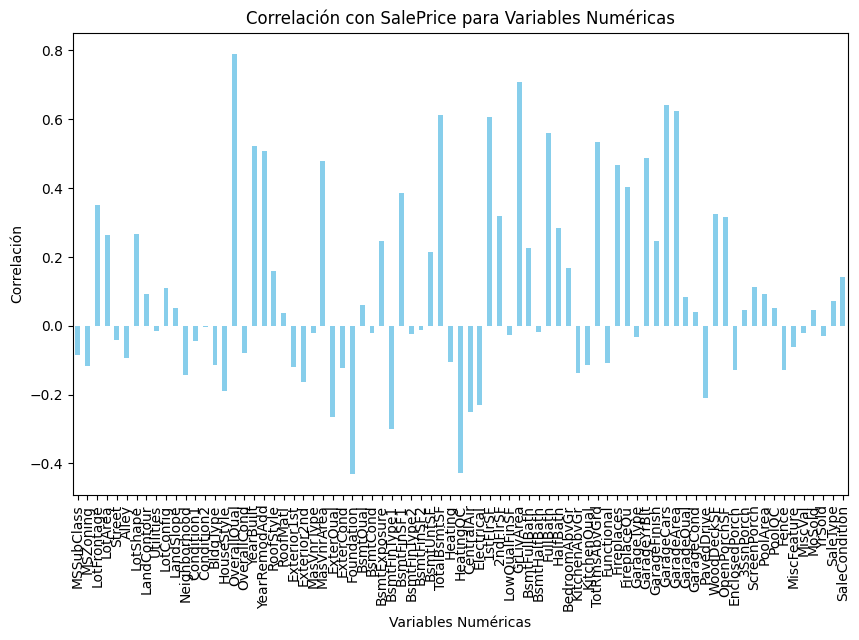

In [ ]:
# Calcular la correlación entre todas las variables y SalePrice
correlation_with_saleprice = data.corr()['SalePrice']

# Crear un gráfico de barras para visualizar la correlación con SalePrice
plt.figure(figsize=(10, 6))
#.drop('SalePrice') sin si mismo
correlation_with_saleprice.drop('SalePrice').drop('Id').plot(kind='bar', color='skyblue')
plt.title('Correlación con SalePrice para Variables Numéricas')
plt.xlabel('Variables Numéricas')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Identificar valores faltantes
missing_data = data.isnull().sum()

missing_percentage = (data.isnull().sum() / len(data)) * 100

missing_info = pd.DataFrame({'Columna': data.columns, 'Valores Faltantes': missing_data, 'Porcentaje Faltante (%)': missing_percentage})
missing_info = missing_info[missing_info['Valores Faltantes'] > 0]
print(missing_info)


                 Columna  Valores Faltantes  Porcentaje Faltante (%)
LotFrontage  LotFrontage                259                17.739726
MasVnrArea    MasVnrArea                  8                 0.547945
GarageYrBlt  GarageYrBlt                 81                 5.547945


Aca hay dos opciones, o eliminar todos los datos faltantes ya que hacen parte de nuestras variables predictivas o no poner las variables con datos faltantes, como el garaje ya esta tomado en cuenta en otras variables no es importante tomar en cuenta eta variable, sin embargo las otras 2 variables si son mas importantes ya que MasVnrArea nos dice el area cubierto y LotFrontage  tambien se puede quitar ya que se uede ver reflejado en LotArea, aunque una tiene mas correlacion quita muchos datos por lo que es mejor no tomarla en cuenta

In [ ]:
#  data = data.dropna()  # Eliminar filas con datos faltantes
data = data.dropna(subset=["MasVnrArea"])

In [ ]:
variables = [
    "LandContour",
    "Neighborhood",
    "Condition 1",
    "HouseStyle",
    "Overqual",
    "MasVnrArea",
    "YearBuilt",
    "YearRemodAdd",
    "BsmtFinSF1",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
    "FullBath",
    "TotRmsAbvGrd",
    "GarageType",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF"
]

Normalizamos el dataset para usarlos posteriormente en el kernel

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [ ]:
# Convertir el arreglo numpy en un DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)


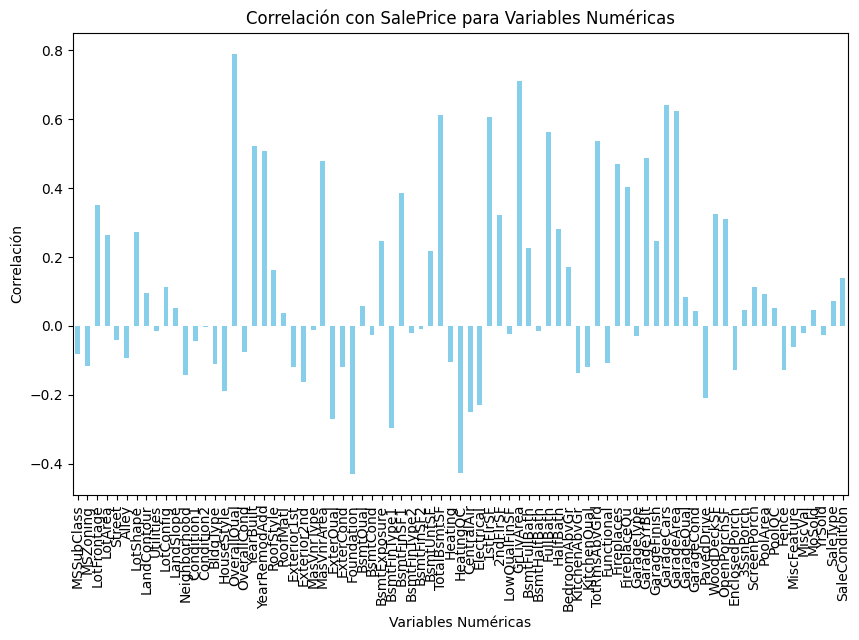

In [ ]:
# Calcular la correlación entre todas las variables y SalePrice
correlation_with_saleprice = data_scaled.corr()['SalePrice']

# Crear un gráfico de barras para visualizar la correlación con SalePrice
plt.figure(figsize=(10, 6))
#.drop('SalePrice') sin si mismo
correlation_with_saleprice.drop('SalePrice').drop('Id').plot(kind='bar', color='skyblue')
plt.title('Correlación con SalePrice para Variables Numéricas')
plt.xlabel('Variables Numéricas')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
feature_names = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen',
    'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
    'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
    'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
]
# Crear un widget de deslizador para seleccionar una característica
feature_selector = widgets.Dropdown(
    options=feature_names,  # Lista de nombres de características
    description='Feature:'
)

# Función para actualizar la gráfica cuando se selecciona una característica
def update_plot(selected_feature):
    plt.figure(figsize=(8, 6))
    plt.scatter(data_scaled[selected_feature], data_scaled['SalePrice'], edgecolor='k', s=20)
    plt.xlabel(selected_feature)
    plt.ylabel('SalePrice')
    plt.title(f'Relación entre {selected_feature} y SalePrice')
    plt.grid(True)
    plt.show()

# Conectar el widget al controlador de actualización
widgets.interactive(update_plot, selected_feature=feature_selector)

interactive(children=(Dropdown(description='Feature:', options=('MSSubClass', 'MSZoning', 'LotFrontage', 'LotA…

Realizamos los conjuntos de entrenamiento, validacion y test

In [ ]:
from sklearn.model_selection import train_test_split

#X = data[["LandContour", "Neighborhood", "Condition1", "HouseStyle", "OverallQual", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageType", "GarageCars", "GarageArea", "WoodDeckSF"]]
X= data
y = data['SalePrice']  # Variable objetivo
print(X.shape)
# Divide los datos en entrenamiento (60%), validación (20%) y prueba (20%)
X_trainn, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_vall, X_testt, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


(1452, 81)


# SPLINE Natural

En esta seccion vamos a realizar splines naturales con las variables numericas que tengan una relacion no lineal con la variable objetivo, en este caso el precio de las casas.
Ademas vamos a tomar la variable Overqual que aunque no parece tener una relacion no lineal es la que tiene mayor correlacion con el precio de las casas por lo que seria interesante ver el error que tiene y neighborhood que parece tener una curva trigonometrica a pesar de que sean variables categoricas y que claramente no van a dar un buen resultado como modelo.

# TotalBsmtSF

In [ ]:
X_train= X_trainn['TotalBsmtSF']
X_test= X_testt['TotalBsmtSF']
X_val  =X_vall['TotalBsmtSF']

In [ ]:
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(871,)
(871,)


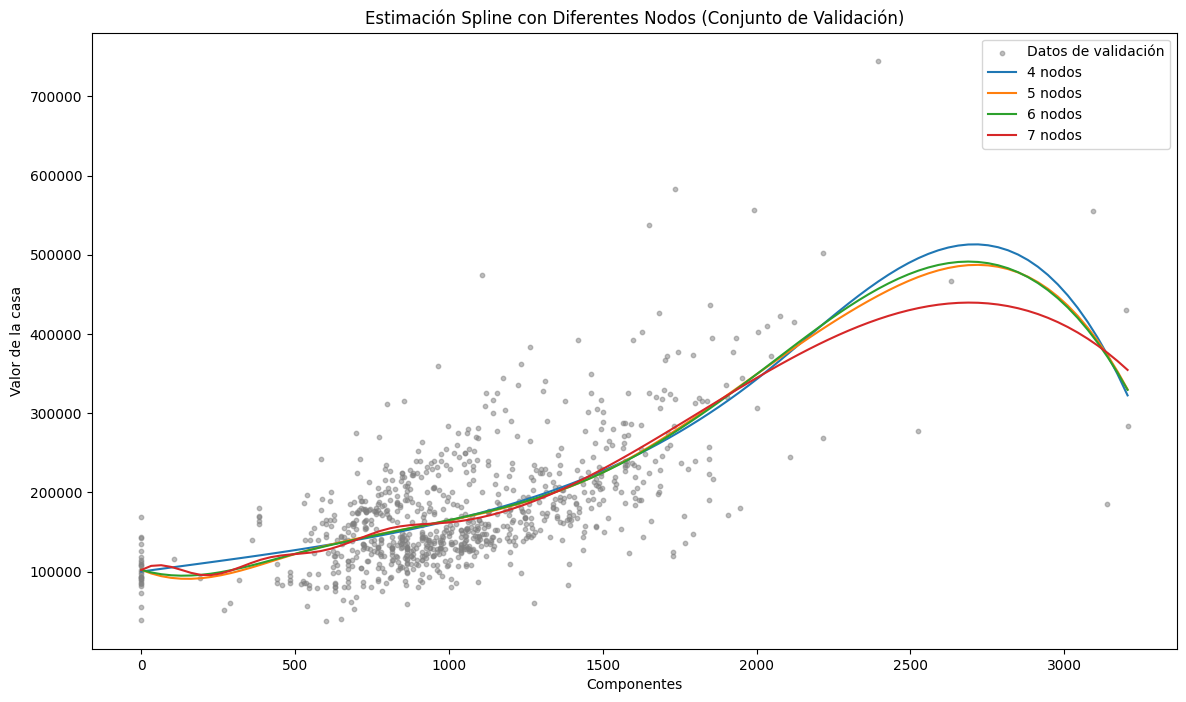

{4: 72108.65652373897,
 5: 67650.11198083036,
 6: 68662.51928262644,
 7: 73399.85693555103}

In [ ]:
from patsy import dmatrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
# Nodos para los splines con 3, 5 y 8 nodos
knots_list = [(1000,2000),
              (500,1500,2400),
              (500,1000,1500,2000),
              (200,400,600,800,1000)]

spline_models = {}
spline_mse = {}

plt.figure(figsize=(14, 8))

plt.scatter(X_train, y_train, s=10, color='gray', alpha=0.5, label="Datos de validación")

for idx, knots in enumerate(knots_list):
    # Número de nodos
    num_nodes = len(knots) + 2

    # Matriz de diseño
    X_spline_train = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                            {"data": X_train.ravel()}, return_type='dataframe')
    X_spline_test = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                          {"data": X_test.ravel()}, return_type='dataframe')

    if X_spline_train.shape[0] == 0:
        print("X_spline_train is empty! Check your knots, data, or formula.")
    else:
      # Ajustamos el modelo de regresión lineal
      model_spline = LinearRegression()
      model_spline.fit(X_spline_train, y_train)

      spline_models[num_nodes] = model_spline

      y_spline_test_pred = model_spline.predict(X_spline_test)
      rmse_test = np.sqrt(mean_squared_error(y_test, y_spline_test_pred))
      r2 = r2_score(y_test, y_spline_test_pred)
      mae = mean_absolute_error(y_test, y_spline_test_pred)
      mape = np.mean(np.abs((y_test - y_spline_test_pred) / y_test)) * 100

      spline_mse[num_nodes] = rmse_test

      # Graficamos el modelo
      X_spline_plot = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                              {"data": X_plot.ravel()}, return_type='dataframe')

      y_spline_plot = model_spline.predict(X_spline_plot)
      plt.plot(X_plot, y_spline_plot, label=f"{num_nodes} nodos")

# Etiquetas y título
plt.xlabel("Componentes")
plt.ylabel("Valor de la casa")
plt.title("Estimación Spline con Diferentes Nodos (Conjunto de Validación)")
plt.legend()
plt.show()

# Mostramos el MSE de validación para cada modelo spline
spline_mse



Podemos ver con el rmse que elmejor modelo es el de 5 nodos con 67650, sin embargo una causa de porque es mejor es debido a la seleccion de nodos que se escogio de forma que esten mas reunidos en el centro de masa y viendo que cambiaba de forma distinta cada 500 meros que esta con la acera.

# MasVnrArea

In [ ]:
X_train= X_trainn['MasVnrArea']
X_test= X_testt['MasVnrArea']

In [ ]:
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(871,)
(871,)


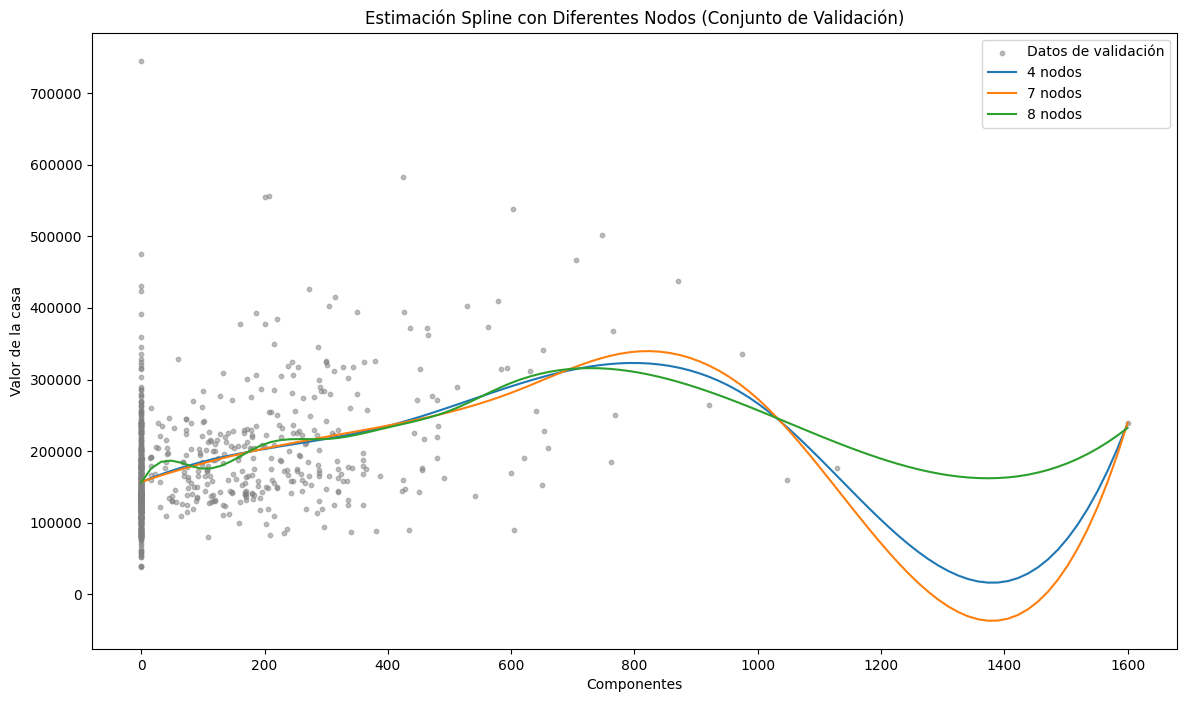

{4: 78312.32328003019, 7: 79518.06633390948, 8: 73093.19288443052}

In [ ]:
from patsy import dmatrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
# Nodos para los splines con 3, 5 y 8 nodos
knots_list = [(400,1000),
              (200,400,600,800,1000),
              (100,200,300,400,500,600)]

spline_models = {}
spline_mse = {}

plt.figure(figsize=(14, 8))

plt.scatter(X_train, y_train, s=10, color='gray', alpha=0.5, label="Datos de validación")

for idx, knots in enumerate(knots_list):
    # Número de nodos
    num_nodes = len(knots) + 2

    # Matriz de diseño
    X_spline_train = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                            {"data": X_train.ravel()}, return_type='dataframe')
    X_spline_test = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                          {"data": X_test.ravel()}, return_type='dataframe')

    if X_spline_train.shape[0] == 0:
        print("X_spline_train is empty! Check your knots, data, or formula.")
    else:
      # Ajustamos el modelo de regresión lineal
      model_spline = LinearRegression()
      model_spline.fit(X_spline_train, y_train)

      spline_models[num_nodes] = model_spline

      y_spline_test_pred = model_spline.predict(X_spline_test)
      rmse_test = np.sqrt(mean_squared_error(y_test, y_spline_test_pred))
      r2 = r2_score(y_test, y_spline_test_pred)
      mae = mean_absolute_error(y_test, y_spline_test_pred)
      mape = np.mean(np.abs((y_test - y_spline_test_pred) / y_test)) * 100

      spline_mse[num_nodes] = rmse_test

      # Graficamos el modelo
      X_spline_plot = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                              {"data": X_plot.ravel()}, return_type='dataframe')

      y_spline_plot = model_spline.predict(X_spline_plot)
      plt.plot(X_plot, y_spline_plot, label=f"{num_nodes} nodos")

# Etiquetas y título
plt.xlabel("Componentes")
plt.ylabel("Valor de la casa")
plt.title("Estimación Spline con Diferentes Nodos (Conjunto de Validación)")
plt.legend()
plt.show()

# Mostramos el MSE de validación para cada modelo spline
spline_mse



Podemos ver con el rmse que elmejor modelo es el de 8 nodos con 73093, sin embargo una causa de porque es mejor es debido a la seleccion de nodos que se escogio de forma que esten principalmente al inicio.

# YearBuilt

In [ ]:
X_train= X_trainn['YearBuilt']
X_test= X_testt['YearBuilt']

In [ ]:
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(871,)
(871,)


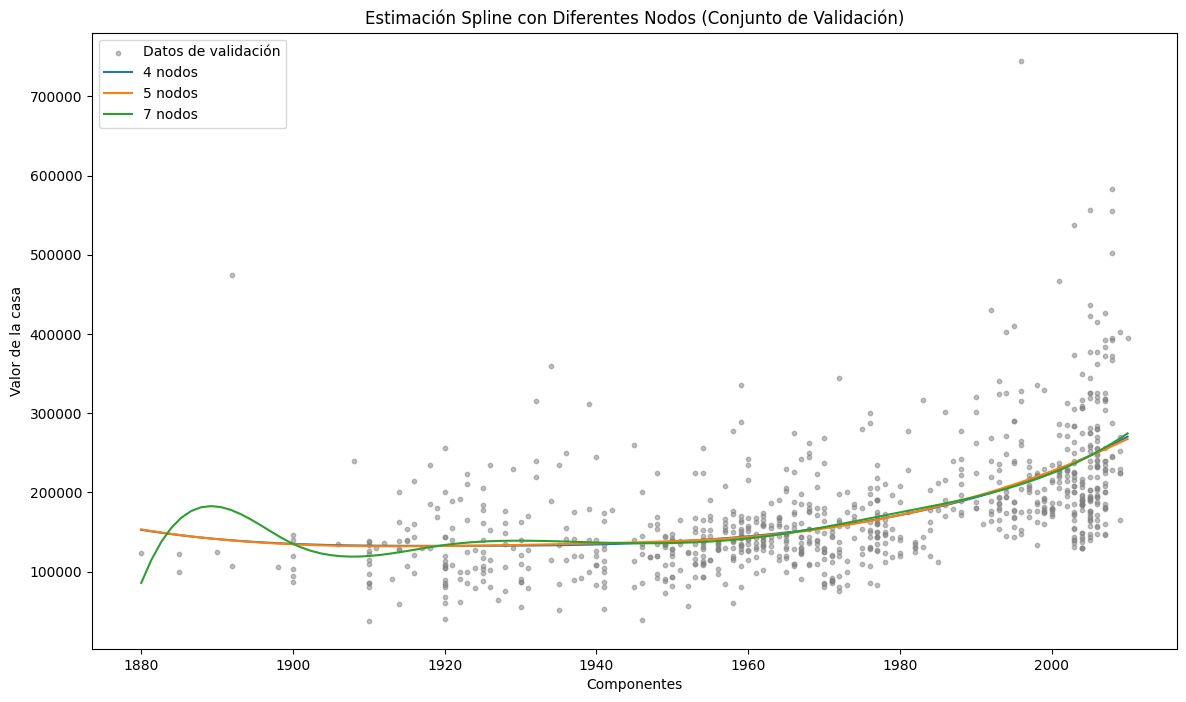

{4: 68110.82380159915, 5: 67943.13532836683, 7: 68038.54313918167}

In [ ]:
from patsy import dmatrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
# Nodos para los splines con 3, 5 y 8 nodos
knots_list = [(1920,1980),
              (1920,1940,1960),
              (1900,1920,1940,1960,1980)]

spline_models = {}
spline_mse = {}

plt.figure(figsize=(14, 8))

plt.scatter(X_train, y_train, s=10, color='gray', alpha=0.5, label="Datos de validación")

for idx, knots in enumerate(knots_list):
    # Número de nodos
    num_nodes = len(knots) + 2

    # Matriz de diseño
    X_spline_train = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                            {"data": X_train.ravel()}, return_type='dataframe')
    X_spline_test = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                          {"data": X_test.ravel()}, return_type='dataframe')

    if X_spline_train.shape[0] == 0:
        print("X_spline_train is empty! Check your knots, data, or formula.")
    else:
      # Ajustamos el modelo de regresión lineal
      model_spline = LinearRegression()
      model_spline.fit(X_spline_train, y_train)

      spline_models[num_nodes] = model_spline

      y_spline_test_pred = model_spline.predict(X_spline_test)
      rmse_test = np.sqrt(mean_squared_error(y_test, y_spline_test_pred))
      r2 = r2_score(y_test, y_spline_test_pred)
      mae = mean_absolute_error(y_test, y_spline_test_pred)
      mape = np.mean(np.abs((y_test - y_spline_test_pred) / y_test)) * 100

      spline_mse[num_nodes] = rmse_test

      # Graficamos el modelo
      X_spline_plot = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                              {"data": X_plot.ravel()}, return_type='dataframe')

      y_spline_plot = model_spline.predict(X_spline_plot)
      plt.plot(X_plot, y_spline_plot, label=f"{num_nodes} nodos")

# Etiquetas y título
plt.xlabel("Componentes")
plt.ylabel("Valor de la casa")
plt.title("Estimación Spline con Diferentes Nodos (Conjunto de Validación)")
plt.legend()
plt.show()

# Mostramos el MSE de validación para cada modelo spline
spline_mse



Podemos ver con las distintas metricas que elmejor modelo segun el rmse es el de 5 nodos con 67943

# Neighborhood

In [ ]:
X_train= X_trainn['Neighborhood']
X_test= X_testt['Neighborhood']

In [ ]:
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(871,)
(871,)


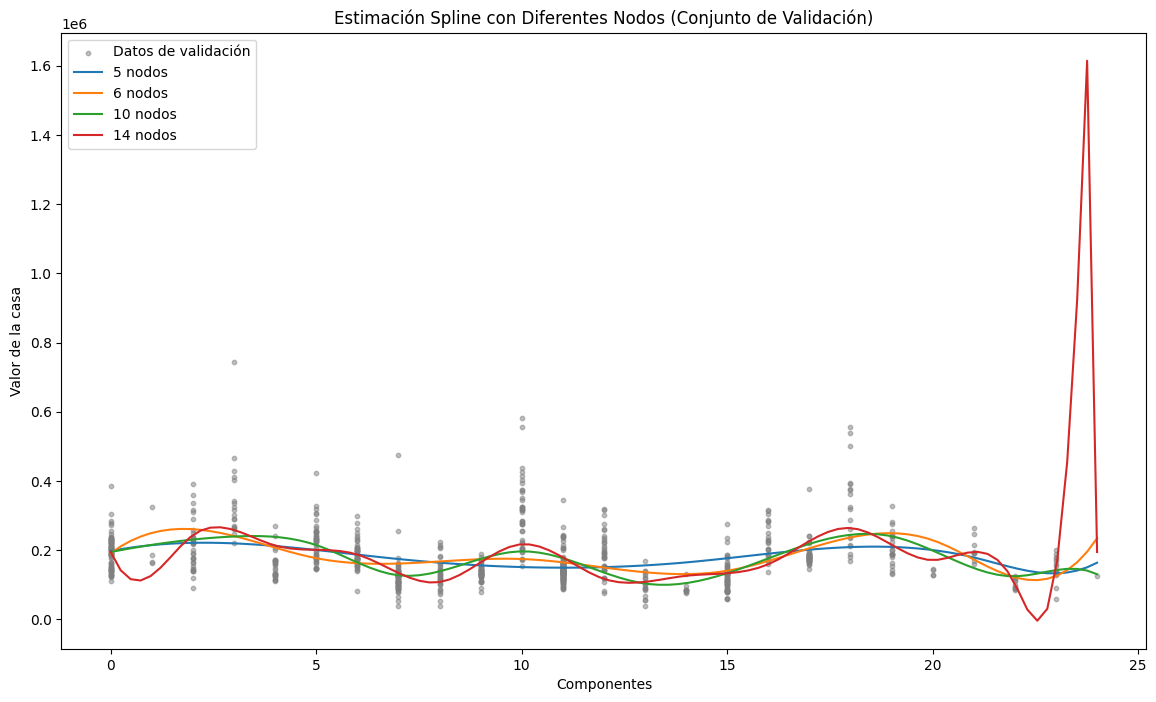

{5: 77503.53026747474,
 6: 74907.02635759849,
 10: 72457.66554426406,
 14: 70682.326429125}

In [ ]:
from patsy import dmatrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
# Nodos para los splines con 3, 5 y 8 nodos
knots_list = [(7,14,21),
              (5,10,15,20),
              (3,5,7,10,13,15,19,22),
              (2,4,6,8,10,12,14,16,18,20,22,24)]

spline_models = {}
spline_mse = {}

plt.figure(figsize=(14, 8))

plt.scatter(X_train, y_train, s=10, color='gray', alpha=0.5, label="Datos de validación")

for idx, knots in enumerate(knots_list):
    # Número de nodos
    num_nodes = len(knots) + 2

    # Matriz de diseño
    X_spline_train = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                            {"data": X_train.ravel()}, return_type='dataframe')
    X_spline_test = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                          {"data": X_test.ravel()}, return_type='dataframe')

    if X_spline_train.shape[0] == 0:
        print("X_spline_train is empty! Check your knots, data, or formula.")
    else:
      # Ajustamos el modelo de regresión lineal
      model_spline = LinearRegression()
      model_spline.fit(X_spline_train, y_train)

      spline_models[num_nodes] = model_spline

      y_spline_test_pred = model_spline.predict(X_spline_test)
      rmse_test = np.sqrt(mean_squared_error(y_test, y_spline_test_pred))
      r2 = r2_score(y_test, y_spline_test_pred)
      mae = mean_absolute_error(y_test, y_spline_test_pred)
      mape = np.mean(np.abs((y_test - y_spline_test_pred) / y_test)) * 100
      rmsle = np.sqrt(mean_squared_log_error(y_test, y_spline_test_pred))

      spline_mse[num_nodes] = rmse_test

      # Graficamos el modelo
      X_spline_plot = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                              {"data": X_plot.ravel()}, return_type='dataframe')

      y_spline_plot = model_spline.predict(X_spline_plot)
      plt.plot(X_plot, y_spline_plot, label=f"{num_nodes} nodos")

# Etiquetas y título
plt.xlabel("Componentes")
plt.ylabel("Valor de la casa")
plt.title("Estimación Spline con Diferentes Nodos (Conjunto de Validación)")
plt.legend()
plt.show()

# Mostramos el MSE de validación para cada modelo spline
spline_mse


Podemos ver con las distintas metricas que la prediccion es bastante mala, probablemente por su condicion de ser un valor natural en neighborhood, de igual forma podemos concluir que es mejor seleccionar buenas ubicaciones para los nodos(10 nodos) que poner la mayor cantidad de nodos(14 nodos) pues esto ocaciona sobreajuste o inestabilidad en el modelo.
Con un rmse de 72457

# OverallQual

In [ ]:
X_train= X_trainn['OverallQual']
X_test= X_testt['OverallQual']

In [ ]:
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(871,)
(871,)


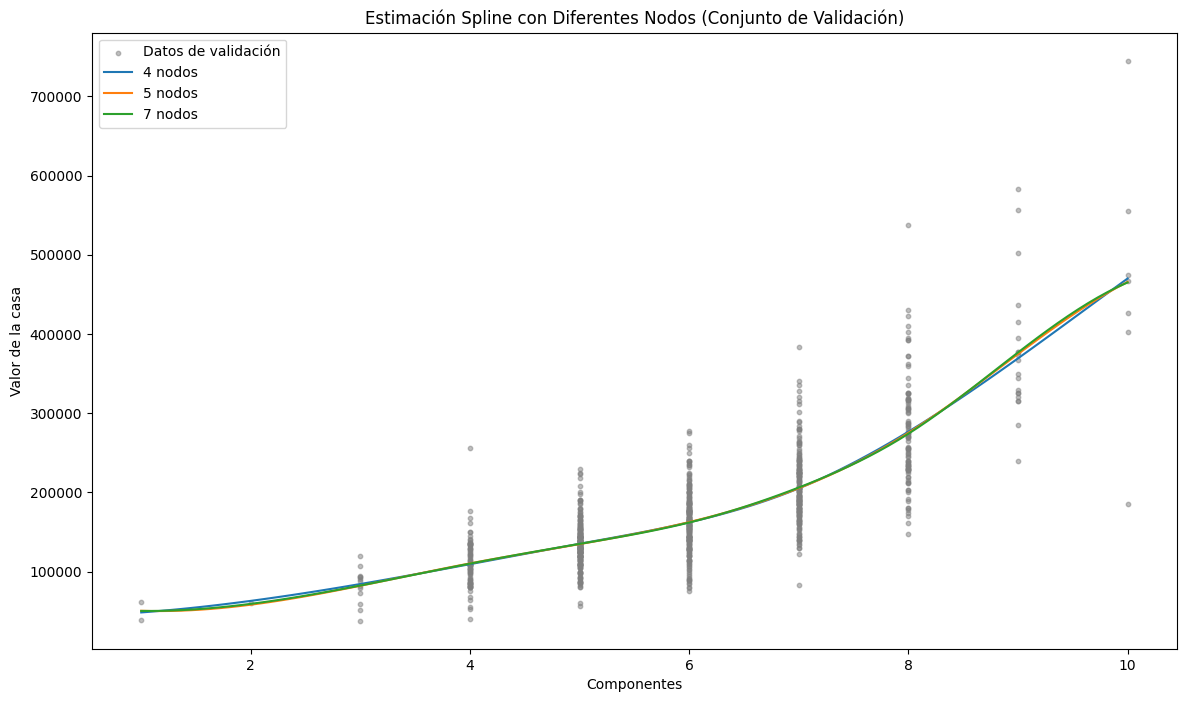

{4: 46966.592777155856, 5: 46067.82994929159, 7: 45730.13097395451}

In [ ]:
from patsy import dmatrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
# Nodos para los splines con 3, 5 y 8 nodos
knots_list = [(5,7),
              (4,6,8),
              (4,5,6,7,8)]

spline_models = {}
spline_mse = {}

plt.figure(figsize=(14, 8))

plt.scatter(X_train, y_train, s=10, color='gray', alpha=0.5, label="Datos de validación")

for idx, knots in enumerate(knots_list):
    # Número de nodos
    num_nodes = len(knots) + 2

    # Matriz de diseño
    X_spline_train = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                            {"data": X_train.ravel()}, return_type='dataframe')
    X_spline_test = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                          {"data": X_test.ravel()}, return_type='dataframe')

    if X_spline_train.shape[0] == 0:
        print("X_spline_train is empty! Check your knots, data, or formula.")
    else:
      # Ajustamos el modelo de regresión lineal
      model_spline = LinearRegression()
      model_spline.fit(X_spline_train, y_train)

      spline_models[num_nodes] = model_spline

      y_spline_test_pred = model_spline.predict(X_spline_test)
      rmse_test = np.sqrt(mean_squared_error(y_test, y_spline_test_pred))
      r2 = r2_score(y_test, y_spline_test_pred)
      mae = mean_absolute_error(y_test, y_spline_test_pred)
      mape = np.mean(np.abs((y_test - y_spline_test_pred) / y_test)) * 100
      rmsle = np.sqrt(mean_squared_log_error(y_test, y_spline_test_pred))

      spline_mse[num_nodes] = rmse_test

      # Graficamos el modelo
      X_spline_plot = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                              {"data": X_plot.ravel()}, return_type='dataframe')

      y_spline_plot = model_spline.predict(X_spline_plot)
      plt.plot(X_plot, y_spline_plot, label=f"{num_nodes} nodos")

# Etiquetas y título
plt.xlabel("Componentes")
plt.ylabel("Valor de la casa")
plt.title("Estimación Spline con Diferentes Nodos (Conjunto de Validación)")
plt.legend()
plt.show()

# Mostramos el MSE de validación para cada modelo spline
spline_mse


Podemos ver con el rmse que el mejor modelo es con 7 nodos, esto ya que su rmse es de 45730, siin embargo podemos ver que la diferencia con respecto a los demas nodos no cambia mucho,esto debido a que parece ser lineal, ademas muestra una mejor solucion que los demas modelos anteriores.

# Kernel

Normalizamos los conjuntos de train y test

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = X_trainn[
    ["LandContour", "Neighborhood", "Condition1", "HouseStyle", "OverallQual", "MasVnrArea", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageType", "GarageCars", "GarageArea", "WoodDeckSF"]
]
X_test = X_testt[
    ["LandContour", "Neighborhood", "Condition1", "HouseStyle", "OverallQual", "MasVnrArea", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageType", "GarageCars", "GarageArea", "WoodDeckSF"]
]

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [ ]:
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [ ]:
y_trainn= scaler.fit_transform(y_train)
y_testt= scaler.fit_transform(y_test)

In [ ]:
X_plot = np.linspace(np.min(X_train), np.max(X_train), 291).reshape(-1, 1)

In [ ]:
import numpy as np

def EUCLIDEANAPONDERADA(lmbda: float, point: np.ndarray, data_x: np.ndarray, data_y: np.ndarray) -> float:
    # Calculamos la distancia euclidiana entre point y cada punto en data_x
    distances = np.linalg.norm((data_x - point), axis=1)

    t = distances / lmbda
    return (t @ data_y) / t.sum()

In [ ]:
X_train.shape

(871, 19)

In [ ]:
X_test.shape

(291, 19)

In [ ]:
y_trainn.shape

(871, 1)

Lambda = 0.1:
MSE: 0.0176
MAE: 0.1053
R^2: -0.2477



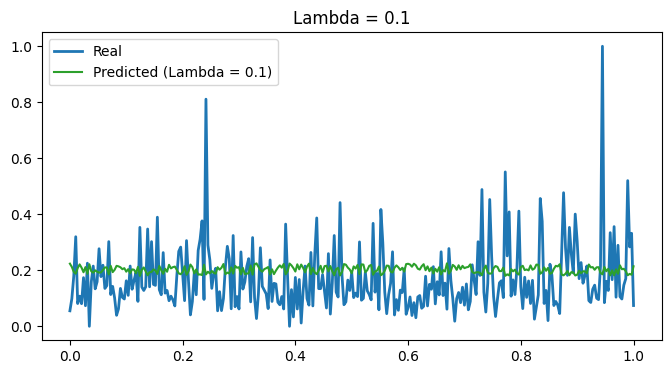

Lambda = 1:
MSE: 0.0176
MAE: 0.1053
R^2: -0.2477



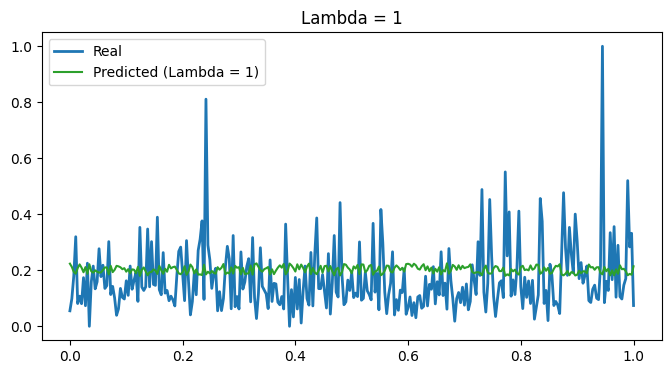

Lambda = 10:
MSE: 0.0176
MAE: 0.1053
R^2: -0.2477



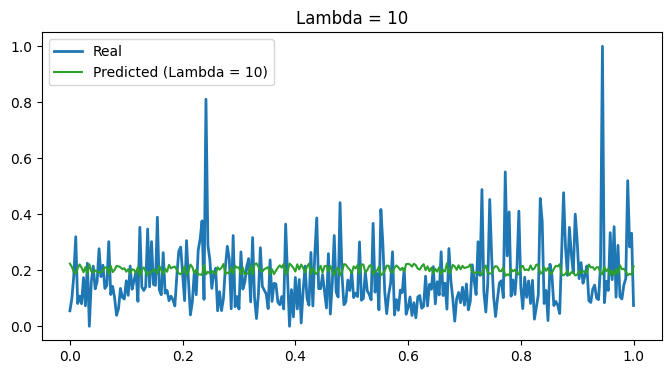

Lambda = 100:
MSE: 0.0176
MAE: 0.1053
R^2: -0.2477



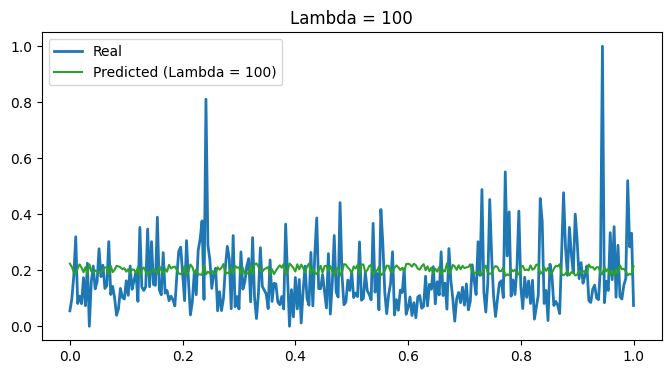

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

lmbda_values = [0.1, 1, 10, 100]

for lmbda in lmbda_values:
    y_pred_E = np.array([EUCLIDEANAPONDERADA(lmbda, x, X_train, y_trainn) for x in X_test])

    mse_E = mean_squared_error(y_testt, y_pred_E)
    mae_E = mean_absolute_error(y_testt, y_pred_E)
    r2_E = r2_score(y_testt, y_pred_E)

    print(f"Lambda = {lmbda}:")
    print(f"MSE: {mse_E:.4f}")
    print(f"MAE: {mae_E:.4f}")
    print(f"R^2: {r2_E:.4f}")
    print()

    plt.figure(figsize=(8, 4))
    plt.plot(X_plot, y_testt, color='C0', linewidth=2, label='Real')
    plt.plot(X_plot, y_pred_E, color='C2', label=f'Predicted (Lambda = {lmbda})')
    plt.legend()
    plt.title(f'Lambda = {lmbda}')
    plt.show()


Finalmente concluimos que no importa el tamaño de la ventana a la hora de hacer el kernel multivariable debido a que siempre nos da igual, por lo que el mejor lambda que seleccionaremos es 0.1.

# Evalucaion de los mejores modelos de Spline y kernel

Para esta seccion usamos el conjunto val cen vez de test para tener un dataset nuevo.

# PRIMERO EVALUAMOS EL SPLINE CON 5 NODOS EN TotalBsmtSF

In [ ]:
X_train= X_trainn['TotalBsmtSF']
X_test= X_testt['TotalBsmtSF']
x_val=  X_vall['TotalBsmtSF']

In [ ]:
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)

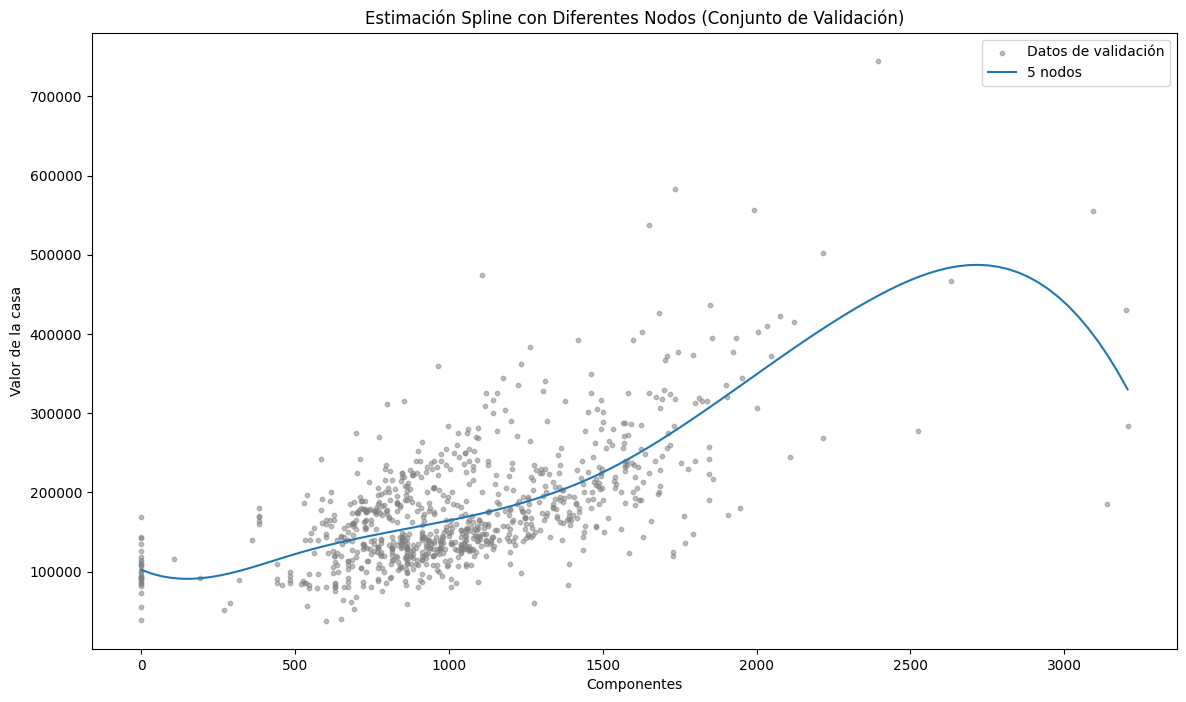

Modelo con 5 nodos:
MSE: 67522.9828
MAE: 49310.4020
R^2: 0.3415


In [ ]:
from patsy import dmatrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
# Nodos para los splines con 3, 5 y 8 nodos
knots_list = [(500,1500,2400)]

spline_models = {}
spline_mse = {}

plt.figure(figsize=(14, 8))

plt.scatter(X_train, y_train, s=10, color='gray', alpha=0.5, label="Datos de validación")

for idx, knots in enumerate(knots_list):
    # Número de nodos
    num_nodes = len(knots) + 2

    # Matriz de diseño
    X_spline_train = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                            {"data": X_train.ravel()}, return_type='dataframe')
    X_spline_test = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                          {"data": X_val.ravel()}, return_type='dataframe')

    if X_spline_train.shape[0] == 0:
        print("X_spline_train is empty! Check your knots, data, or formula.")
    else:
      # Ajustamos el modelo de regresión lineal
      model_spline = LinearRegression()
      model_spline.fit(X_spline_train, y_train)

      spline_models[num_nodes] = model_spline

      y_spline_test_pred = model_spline.predict(X_spline_test)
      rmse_test = np.sqrt(mean_squared_error(y_val, y_spline_test_pred))
      r2 = r2_score(y_val, y_spline_test_pred)
      mae = mean_absolute_error(y_val, y_spline_test_pred)

      spline_mse[num_nodes] = rmse_test

      # Graficamos el modelo
      X_spline_plot = dmatrix(f"bs(data, knots={knots}, degree=3, include_intercept=False)",
                              {"data": X_plot.ravel()}, return_type='dataframe')

      y_spline_plot = model_spline.predict(X_spline_plot)
      plt.plot(X_plot, y_spline_plot, label=f"{num_nodes} nodos")

# Etiquetas y título
plt.xlabel("Componentes")
plt.ylabel("Valor de la casa")
plt.title("Estimación Spline con Diferentes Nodos (Conjunto de Validación)")
plt.legend()
plt.show()

# Mostramos el MSE de validación para cada modelo spline
spline_mse
print(f"Modelo con {num_nodes} nodos:")
print(f"MSE: {rmse_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")


In [ ]:
valor_escalado = scaler.transform([[67522.98281176225]])[0][0]
valor_escalado2 = scaler.transform([[49310.4020]])[0][0]

In [ ]:
print(f"valores escalado:, MSE: {valor_escalado:.4f}, MAE: {valor_escalado2:.4f}")

valores escalado:, MSE: 0.0566, MAE: 0.0250


# AHORA EVALUAMOS KERNEL

In [ ]:
X_train = X_trainn[
    ["LandContour", "Neighborhood", "Condition1", "HouseStyle", "OverallQual", "MasVnrArea", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageType", "GarageCars", "GarageArea", "WoodDeckSF"]
]
X_val = X_vall[
    ["LandContour", "Neighborhood", "Condition1", "HouseStyle", "OverallQual", "MasVnrArea", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageType", "GarageCars", "GarageArea", "WoodDeckSF"]
]

In [ ]:
X_train= scaler.fit_transform(X_train)
X_val= scaler.fit_transform(X_val)

In [ ]:
y_train = y_train.reshape(-1, 1)
y_val = y_val.to_numpy().reshape(-1, 1)

In [ ]:
y_trainn= scaler.fit_transform(y_train)
y_vall= scaler.fit_transform(y_val)

In [ ]:
X_plot = np.linspace(np.min(X_train), np.max(X_train), 290).reshape(-1, 1)

Lambda = 0.1:
MSE: 0.0274
RMSE: 0.1655
MAE: 0.1182
R^2: -0.3163



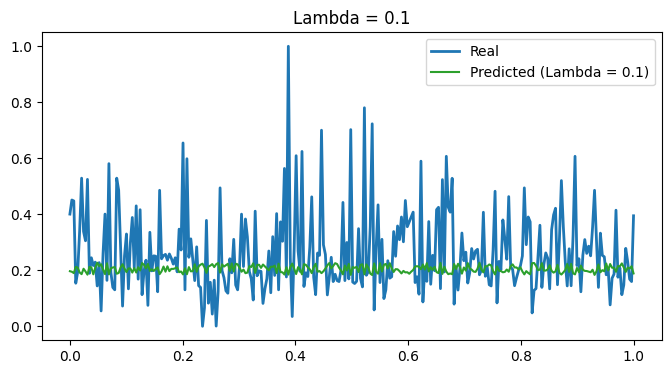

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

lmbda_values = [0.1]

for lmbda in lmbda_values:
    y_pred_E = np.array([EUCLIDEANAPONDERADA(lmbda, x, X_train, y_trainn) for x in X_val])

    mse_E = mean_squared_error(y_vall, y_pred_E)
    rmse_E = np.sqrt(mse_E)
    mae_E = mean_absolute_error(y_vall, y_pred_E)
    r2_E = r2_score(y_vall, y_pred_E)

    print(f"Lambda = {lmbda}:")
    print(f"MSE: {mse_E:.4f}")
    print(f"RMSE: {rmse_E:.4f}")
    print(f"MAE: {mae_E:.4f}")
    print(f"R^2: {r2_E:.4f}")
    print()

    plt.figure(figsize=(8, 4))
    plt.plot(X_plot, y_vall, color='C0', linewidth=2, label='Real')
    plt.plot(X_plot, y_pred_E, color='C2', label=f'Predicted (Lambda = {lmbda})')
    plt.legend()
    plt.title(f'Lambda = {lmbda}')
    plt.show()


# Finalmente decimos que aunque las 2 predicciones no son tan buenas es mejor la del spline ya que tiene menor rmse de 0.05 escalado, sin escalar de 67522, en las demas metricas tambien es menor